In [1]:
import os

import libstempo as LT
from enterprise.pulsar import Pulsar
from enterprise.signals import signal_base

import sys
sys.path.append("../src/")
from build_enterprise_signals import MakeSglPsrSignal

In [2]:
psrname = "J1600-3053"
pathDirData = "../../data-epta_tmp/"
LTfit = 0
ephem='DE440'
noisedir=None
sampler="ptmcmc"
Nsamples=1e6
empdist_dir=None
empdist_kde=False
# resume=False
# CleanOutDir=False

In [3]:
basePath = pathDirData+'/'+psrname+'/'+psrname
# UpdateFlags(basePath+'_all.tim') # Shouldn't be used
print("\nParfile & timfile :")
print(basePath+'.par')
print(basePath+'_all.tim\n')


Parfile & timfile :
../../data-epta_tmp//J1600-3053/J1600-3053.par
../../data-epta_tmp//J1600-3053/J1600-3053_all.tim



In [4]:
# Load the pulsars with libstempo
print("\nRead ToAs with libstempo.")
ltpsr = LT.tempopulsar(basePath+'.par', basePath+'_all.tim', ephem=ephem)


Read ToAs with libstempo.


In [5]:
from enterprise.signals import selections

In [38]:
bands = {"1":[0,1000],
             "2":[1000,2000],
             "3":[2000,3000],
             "4":[3000,1e4]}

In [42]:
bands.values()

dict_values([[0, 1000], [1000, 2000], [2000, 3000], [3000, 10000.0]])

In [47]:
for name, (bi, bf) in bands.items():
    print(name)
    print(bi, bf)

1
0 1000
2
1000 2000
3
2000 3000
4
3000 10000.0


In [105]:
import numpy as np
def by_band(flags):
    """Selection function to split by PPTA frequency band under -B flag"""
    flagvals = np.unique(flags["B"])
    return {val: flags["B"] == val for val in flagvals}

def by_epta_band(freqs):
    """Selection function to split by EPTA from frequency value"""
    bands = {"1":[0,1000],
             "2":[1000,2000],
             "3":[2000,3000],
             "4":[3000,10000]}
    
    return {"Band.%s"%name: (freqs>=fl) & (freqs<fh) for name, (fl, fh) in bands.items() if any((freqs>=fl) & (freqs<fh))}

In [106]:
psr = Pulsar(ltpsr)

In [110]:
selection = selections.Selection(by_epta_band)

In [100]:
a = selection(psr)

TypeError: __init__() got an unexpected keyword argument 'par'

In [97]:
a.masks

TypeError: by_epta_band() missing 1 required positional argument: 'par'

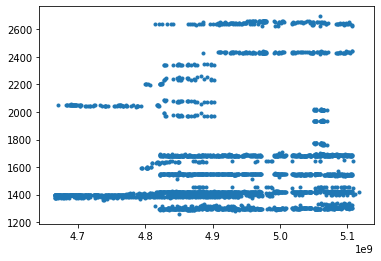

In [75]:
plt.plot(psr.toas, psr.freqs,'.')

In [81]:
import matplotlib.pyplot as plt
plt.plot(psr.toas, psr.freqs*a.masks["Band.2"],'.', color='b')
plt.plot(psr.toas, psr.freqs*a.masks["Band.3"],'.', color='r')
#plt.ylim([0.7,1.3])

In [24]:
import numpy as np
np.unique(ltpsr.flagvals("group"))

array(['EFF.P200.1380', 'EFF.P217.1380', 'EFF.S110.2487',
       'JBO.ROACH.1520', 'LEAP.1396', 'NRT.BON.1400', 'NRT.BON.1600',
       'NRT.BON.2000', 'NRT.NUPPI.1484', 'NRT.NUPPI.1854',
       'NRT.NUPPI.2154', 'NRT.NUPPI.2539', 'WSRT.P1.1380.C',
       'WSRT.P2.1380'], dtype='<U32')

In [25]:
ltpsr.flags()[:] = ltpsr.flags() + ["bandnoise"]

In [30]:
ltpsr._

In [19]:
ltpsr.flagvals("bandnoise")[:] = len(ltpsr.toas()) * ["a"]

ValueError: assignment destination is read-only

In [6]:
model = "TM,WN,RN_nb-30_psd-bpl"

In [7]:
# # Fit TM (or not)
if LTfit>=1:
    print("Fit %s times for the timing model."%LTfit)
for i in range(LTfit):
    ltpsr.fit()

In [9]:
# Create enterprise pulsar objects
print("\nMake enterprise pulsar object.")
if "TM_fit" in model:
    psr = Pulsar(ltpsr, ephem=ephem, drop_t2pulsar=False) # Save T2 pulsar object if fit for TM during MCMC
else:
    psr = Pulsar(ltpsr, ephem=ephem)


Make enterprise pulsar object.


In [11]:
# if sSampler == "Mdynesty" or sSampler == "Mddynesty":
# 	global pta

###### MAKE MODEL
print("\nBuild enterprise signals.")
s = MakeSglPsrSignal(psr, model)

# s, rM, empdist_pars = MakeSglPsrSignal(sModel, psr)
# print(rM)

models = []
models.append(s(psr))

pta = signal_base.PTA(models)

for i,p in enumerate(pta.params):
    print("%s : %s"%(i, p))


Build enterprise signals.

### Noise Model J1600-3053: TM,WN,RN_nb-30_psd-bpl
- timing model, marginalized
- White-noise, varied
- Achromatic red-noise broken_powerlaw with 30 frequency bins using linear distribution.
0 : J1600-3053_EFF.P200.1380_efac:Uniform(pmin=0.1, pmax=5.0)
1 : J1600-3053_EFF.P200.1380_log10_tnequad:Uniform(pmin=-9, pmax=-5)
2 : J1600-3053_EFF.P217.1380_efac:Uniform(pmin=0.1, pmax=5.0)
3 : J1600-3053_EFF.P217.1380_log10_tnequad:Uniform(pmin=-9, pmax=-5)
4 : J1600-3053_EFF.S110.2487_efac:Uniform(pmin=0.1, pmax=5.0)
5 : J1600-3053_EFF.S110.2487_log10_tnequad:Uniform(pmin=-9, pmax=-5)
6 : J1600-3053_JBO.DFB.1520_efac:Uniform(pmin=0.1, pmax=5.0)
7 : J1600-3053_JBO.DFB.1520_log10_tnequad:Uniform(pmin=-9, pmax=-5)
8 : J1600-3053_JBO.ROACH.1520_efac:Uniform(pmin=0.1, pmax=5.0)
9 : J1600-3053_JBO.ROACH.1520_log10_tnequad:Uniform(pmin=-9, pmax=-5)
10 : J1600-3053_LEAP.1396_efac:Uniform(pmin=0.1, pmax=5.0)
11 : J1600-3053_LEAP.1396_log10_tnequad:Uniform(pmin=-9, pmax=-5)
1

In [12]:
# Get GP infos
pta._signal_dict['J1600-3053_rn']._bases['']._defaults

{'nmodes': 30,
 'Tspan': None,
 'modes': array([2.21229785e-09, 4.42459571e-09, 6.63689356e-09, 8.84919142e-09,
        1.10614893e-08, 1.32737871e-08, 1.54860850e-08, 1.76983828e-08,
        1.99106807e-08, 2.21229785e-08, 2.43352764e-08, 2.65475742e-08,
        2.87598721e-08, 3.09721700e-08, 3.31844678e-08, 3.53967657e-08,
        3.76090635e-08, 3.98213614e-08, 4.20336592e-08, 4.42459571e-08,
        4.64582549e-08, 4.86705528e-08, 5.08828506e-08, 5.30951485e-08,
        5.53074464e-08, 5.75197442e-08, 5.97320421e-08, 6.19443399e-08,
        6.41566378e-08, 6.63689356e-08]),
 'pshift': False,
 'pseed': None}

In [183]:
pta._signal_dict['J1600-3053_rn']._prior

{'': J1600-3053_rn(J1600-3053_rn_log10_A:Uniform(pmin=-18, pmax=-10), J1600-3053_rn_gamma:Uniform(pmin=0, pmax=7), J1600-3053_rn_log10_fb:Uniform(pmin=-10, pmax=-6), J1600-3053_rn_kappa:Uniform(pmin=0.01, pmax=0.5))}

In [167]:
1/ (ltpsr.toas().max()-ltpsr.toas().min()*86400)

-2.1434273326793951942e-10

In [169]:
1 / ((ltpsr.toas().max()-ltpsr.toas().min()) * 86400)

4.4245957082693939593e-09

In [160]:
pta._signal_dict['J1600-3053_chrom-rn_gp']._bases['']._defaults

{'nmodes': 100,
 'Tspan': None,
 'idx': 6.0,
 'modes': array([2.21229785e-09, 2.31763808e-09, 2.42799416e-09, 2.54360493e-09,
        2.66472060e-09, 2.79160327e-09, 2.92452757e-09, 3.06378115e-09,
        3.20966539e-09, 3.36249603e-09, 3.52260381e-09, 3.69033524e-09,
        3.86605333e-09, 4.05013837e-09, 4.24298876e-09, 4.44502186e-09,
        4.65667492e-09, 4.87840600e-09, 5.11069498e-09, 5.35404457e-09,
        5.60898143e-09, 5.87605730e-09, 6.15585019e-09, 6.44896564e-09,
        6.75603799e-09, 7.07773182e-09, 7.41474335e-09, 7.76780194e-09,
        8.13767168e-09, 8.52515304e-09, 8.93108462e-09, 9.35634494e-09,
        9.80185434e-09, 1.02685770e-08, 1.07575230e-08, 1.12697506e-08,
        1.18063683e-08, 1.23685374e-08, 1.29574746e-08, 1.35744545e-08,
        1.42208124e-08, 1.48979470e-08, 1.56073240e-08, 1.63504785e-08,
        1.71290188e-08, 1.79446300e-08, 1.87990770e-08, 1.96942092e-08,
        2.06319638e-08, 2.16143703e-08, 2.26435548e-08, 2.37217447e-08,
        2.

In [120]:
pta.get_basis()[0].shape

(2987, 260)

In [105]:
len(ltpsr.pars())

47

In [108]:
47 + 60 + 200

307